In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 大綱
   * [卡組載入](#卡組載入)
   * [統計資料](#統計資料)
   * [FP Tree](#FP-Tree)

## 卡組載入

In [2]:
data = pd.read_csv('皇室對戰分析/merged.csv')
cards = pd.read_csv('皇室對戰分析/cards.csv')['Name']

cols = ['cards_0_name', 'cards_1_name', 'cards_2_name', 'cards_3_name', 'cards_4_name', 'cards_5_name', 'cards_6_name', 'cards_7_name']
TeamDeck = pd.DataFrame(data.iloc[:,6:14]).set_axis(cols, axis = 1)
OpponentDeck = pd.DataFrame(data.iloc[:,14:]).set_axis(cols, axis = 1)
decks = pd.concat([TeamDeck, OpponentDeck], ignore_index=True)

decks.head()

,cards_0_name,cards_1_name,cards_2_name,cards_3_name,cards_4_name,cards_5_name,cards_6_name,cards_7_name
0,Arrows,Bandit,Dark Prince,Giant Skeleton,Inferno Dragon,Golem,Minion Horde,Miner
1,Arrows,Bandit,Dark Prince,Giant Skeleton,Inferno Dragon,Golem,Minion Horde,Miner
2,Arrows,Bandit,Dark Prince,Giant Skeleton,Inferno Dragon,Golem,Minion Horde,Miner
3,Arrows,Bandit,Dark Prince,Giant Skeleton,Inferno Dragon,Golem,Minion Horde,Miner
4,Arrows,Bandit,Dark Prince,Giant Skeleton,Inferno Dragon,Golem,Minion Horde,Miner
...,...,...,...,...,...,...,...,...
63861,Goblin Barrel,Goblins,Ice Spirit,Mighty Miner,Princess,Cannon,Lightning,The Log
63862,Phoenix,Electro Giant,Goblin Cage,Bowler,Mother Witch,Tornado,Lightning,Barbarian Barrel
63863,Goblin Drill,Mighty Miner,Wall Breakers,Cannon,Goblins,Ice Spirit,Fireball,The Log
63864,Inferno Dragon,Hog Rider,Electro Wizard,Mini P.E.K.K.A,Arrows,Mega Knight,Valkyrie,Fireball


## 統計資料

In [3]:
card_count = pd.concat([cards, pd.DataFrame([0]*len(cards), columns = ['count'])], axis = 1)

"""for deck in decks.values:
    for i in deck:
        x = (card_count['Name'] == i)
        card_count.loc[x] = i, card_count.loc[x]['count'].values[0]+1"""

for card in cards:
    x = decks[(decks.iloc[:, :] == card)]
    card_count.loc[card_count['Name'] == card] = card, x.count().values.sum()

useRate = pd.DataFrame([i / decks.shape[0] for i in card_count['count']], columns = ['UseRate'])
card_count = pd.concat([card_count, useRate], axis = 1)
card_count = card_count.loc[card_count['count'] > 0].sort_values(by = ['count'], ascending=False, ignore_index = True)

print(card_count.shape)
card_count.head()

(109, 3)


,Name,count,UseRate
0,The Log,25139,0.393621
1,Goblins,17222,0.269658
2,Tornado,15422,0.241474
3,Barbarian Barrel,14940,0.233927
4,Phoenix,14523,0.227398
...,...,...,...
104,Wizard,490,0.007672
105,Witch,356,0.005574
106,Furnace,338,0.005292
107,Clone,311,0.004870


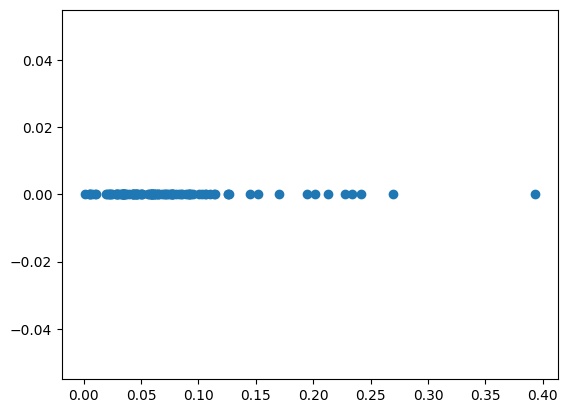

In [4]:
plt.scatter(card_count['UseRate'].values, [0]*card_count.shape[0])
plt.show()

In [5]:
"""
0 - 10%的意外的多
"""
precents = [[i/20, 0] for i in reversed(range(20))]
prev_total = 0
for i in precents:
    x = (card_count[card_count['UseRate'] >= i[0]])
    i[1] = x['UseRate'].count() - prev_total
    prev_total = x['UseRate'].count()
    
for i in precents:
    if i[1] == 0:continue
    print(str(int(i[0]*100)) + ' - ' + str(int(i[0]*100) + 5) + '%', i[1])

35 - 40% 1
25 - 30% 1
20 - 25% 5
15 - 20% 3
10 - 15% 11
5 - 10% 43
0 - 5% 45


## FP Tree
<br>
函式"fpGrowth"來源: https://github.com/stonycat/ML-in-Action-Code-and-Note/blob/master/ch12/fpGrowth.py 的稍微修改版<br>
修改為不再把重複的set去除 請看initset的輸出部分 後面的數字代表相同的卡組數量

In [13]:
import fpGrowth as fp

initset = fp.createInitSet(decks.values)
print(len(initset))
tree, headerTab = fp.createTree(initset, minSup = len(initset) * 0.05)
tree.disp()

4295
   Null Set   1
     Arrows   7110
       Miner   2821
         Dark Prince   86
           Bandit   85
             Inferno Dragon   85
               Minion Horde   85
                 Golem   85
                   Giant Skeleton   85
           Minions   1
             Minion Horde   1
               Giant   1
                 Giant Snowball   1
                   Witch   1
         Zap   717
           Hog Rider   1
             Electro Wizard   1
               Giant   1
                 P.E.K.K.A   1
                   Ram Rider   1
           Balloon   486
             Inferno Dragon   463
               Lava Hound   457
                 Barbarians   457
                   Skeleton Dragons   456
                   Flying Machine   1
               Minions   6
                 Lava Hound   5
                   Barbarians   5
                 Bomber   1
                   Lava Hound   1
             Minions   23
               Minion Horde   23
                 Lava Hound   2

         Sparky   2
           Mini P.E.K.K.A   2
             Rage   2
               Giant   2
                 Elixir Collector   2
                   Wizard   2
         Mother Witch   1
           Sparky   1
             Monk   1
               Rage   1
                 Giant   1
                   Battle Healer   1
       Bandit   3
         Lumberjack   3
           Golden Knight   2
             Rage   2
               Elixir Collector   2
                 Cannon Cart   2
                   Mirror   2
           Ice Golem   1
             Rage   1
               Elixir Collector   1
                 Cannon Cart   1
                   Mirror   1
       Royal Ghost   5
         Bandit   5
           Lumberjack   4
             Rage   4
               Elixir Collector   4
                 Cannon Cart   4
                   Mirror   4
           Magic Archer   1
             Elite Barbarians   1
               Rage   1
                 Heal Spirit   1
                   Battle Ram 

In [14]:
initset

{frozenset({'Arrows',
            'Bandit',
            'Dark Prince',
            'Giant Skeleton',
            'Golem',
            'Inferno Dragon',
            'Miner',
            'Minion Horde'}): 85,
 frozenset({'Executioner',
            'Goblins',
            'Hog Rider',
            'Ice Spirit',
            'Rocket',
            'The Log',
            'Tornado',
            'Valkyrie'}): 527,
 frozenset({'Arrows',
            'Bomber',
            'Freeze',
            'Hog Rider',
            'Ice Golem',
            'Inferno Dragon',
            'Tesla',
            'Valkyrie'}): 25,
 frozenset({'Archer Queen',
            'Barbarian Barrel',
            'Furnace',
            'Goblin Gang',
            'Goblin Hut',
            'Lightning',
            'Mega Knight',
            'Minions'}): 76,
 frozenset({'Goblin Barrel',
            'Goblin Gang',
            'Ice Spirit',
            'Inferno Tower',
            'Princess',
            'Rocket',
            'The Log',